# ACP (ꈍᴗꈍ)♡

L'ACP permet de calculer des matrices pour projeter les variables dans un nouvel espace en utilisant une nouvelle matrice qui montre le degré de similarité entre les variables.

> #### Termes importants :
>
>| **Terme en anglais**  | **Traduction en français**         | **Définition**                                        |
>|-----------------------|------------------------------------------------|-------------------------------------------|
>| Principal Component Analysis | Analyse en Composantes Principales | Méthode statistique qui permet de réduire le nombre de variables|
>| Feature | Variable                     | Variable utilisée pour prédire une variable cible |
>| Principal Component | Composante Principale   | Nouvelle variable calculée à partir des variables initiales |
>| Eigenvalue   | Valeur propre                  | Valeur associée à une composante principale         |
>| Eigenvector  | Vecteur propre                 | Vecteur associé à une composante principale          |
>| Scalar | scalaire | Nombre unique |
>| Vector | vecteur | Liste de nombres |
>| Data mean | Moyenne des données | Moyenne des données |




**Résumé :**

Les étapes de l'ACP 
| **Étape**  | **Description**         |**Formule**|
|-----------------------|------------------------------------------------|-------------------------------------------|
| 1 | Déterminer les données | $X$ |
| 2 | Centrer les données | $X_c = X - \bar{X}$ |
| 3 | Calculer la matrice de covariance | $C = \frac{1}{n-1}X_c^TX_c$ |
| 4 | Calculer les valeurs propres et les vecteurs propres de la matrice de covariance | $C = PDP^{-1}$ |
| 5 | projeter les données dans le nouvel espace | $Y = X_cP$ |




## 1. Principe de l'ACP

Supposons que nous avons un dataset, conçu de 1000 variables. En utilisant l'ACP, nous cherchons à obtenir un nombre réduit de variables, mais ce n'est pas en éliminant certaines!

En effet, le principe c'est d'obtenir 1000 nouvelles variables.
De ces 1000 nouvelles variables, nous n'allons garder qu'un nombre réduit, par exemple **10** et qui expliquent **le plus** de variance possible.

***Exemple :***
- Entrée : 1000 variables (X1, X2, X3, ..., X1000)
- Sortie : 1000 variables (Y1, Y2, Y3, ..., Y1000)
- Pourcentage de variance expliquée par chaquque variable : 80% (Y1), 15% (Y2), 3% (Y3), ..., 0.0000000000001% (Y1000)

Nous allons donc garder les 3 variables qui expliquent le plus de variance : Y1, Y2, Y3. [80+15+3 = 98%]


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.1. Rappels mathématiques
#### 1.1.1. Scalaire et vecteur
- Un scalaire est un nombre unique. 

On peut dire que toute valeur n'ayant pas une direction est un scalaire. Par exemple, la température un scalaire.

- Un vecteur est une liste de nombres.

On peut dire que toute valeur ayant une direction est un vecteur. Par exemple, la vitesse est un vecteur.


In [115]:
# Déclarer un scalaire
x = 1
print(x)
# Déclarer un vecteur
x = [1, 2, 3]
print(x)

1
[1, 2, 3]



#### 1.1.2. Matrice

Une matrice est une liste de vecteurs.

La multiplication de matrices ce fait en multipliant les lignes de la première matrice par les colonnes de la deuxième matrice.

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
\begin{bmatrix}
1 & 2 \\
4 & 5 \\
7 & 8
\end{bmatrix}
=
\begin{bmatrix}
(1*1 + 2*4 + 3*7) & (1*2 + 2*5 + 3*8) \\
(4*1 + 5*4 + 6*7) & (4*2 + 5*5 + 6*8) \\
(7*1 + 8*4 + 9*7) & (7*2 + 8*5 + 9*8)
\end{bmatrix}
$$
$$
=
\begin{bmatrix}
30 & 36 \\
66 & 81 \\
102 & 126
\end{bmatrix}
$$

In [116]:
# Déclarer une matrice
x = [[1, 2, 3], [4, 5, 6]]

# En utilisant numpy
import numpy as np
x = np.array([[1, 2, 3], [4, 5, 6]])
print(x)

# En utilisant pandas
import pandas as pd
x = pd.DataFrame([[1, 2, 3], [4, 5, 6]])
print(x)

[[1 2 3]
 [4 5 6]]
   0  1  2
0  1  2  3
1  4  5  6


#### 1.1.3. Transposée d'une matrice

La transposée d'une matrice est une matrice qui a les lignes et les colonnes inversées.

$$\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12
\end{bmatrix}^T
=
\begin{bmatrix}
1 & 4 & 7 & 10 \\
2 & 5 & 8 & 11 \\
3 & 6 & 9 & 12
\end{bmatrix}
$$

In [117]:
# Transposer une matrice
x = np.array([[1, 2, 3], [4, 5, 6]])
print(x.T)

# Transposer une matrice avec pandas
x = pd.DataFrame([[1, 2, 3], [4, 5, 6]])
print(x.T)

[[1 4]
 [2 5]
 [3 6]]
   0  1
0  1  4
1  2  5
2  3  6


#### 1.1.4. Inverse d'une matrice

La matrice inverse d'une matrice A est une matrice B telle que :

$$
AB = BA = I
$$

Avec I la matrice identité.

$$
\begin{bmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10 & 11 & 12 \\
13 & 14 & 15 & 16
\end{bmatrix}
\begin{bmatrix}
-2 & 1 & 2 & -1 \\
1.5 & -0.5 & -1 & 0.5 \\
2 & -1 & -2 & 1 \\
-1.5 & 0.5 & 1 & -0.5
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$



In [118]:
# Inverson d'une matrice
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(np.linalg.inv(x))

# Inversion d'une matrice avec pandas
x = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x.T)

# Produit scalaire
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(np.dot(x, y))

# Produit scalaire avec pandas
x = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x.dot(y))



[[ 3.15251974e+15 -6.30503948e+15  3.15251974e+15]
 [-6.30503948e+15  1.26100790e+16 -6.30503948e+15]
 [ 3.15251974e+15 -6.30503948e+15  3.15251974e+15]]
   0  1  2
0  1  4  7
1  2  5  8
2  3  6  9
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
     0    1    2
0   30   36   42
1   66   81   96
2  102  126  150


#### 1.1.5. Valeur propre et vecteur propre

La valeur propre d'une matrice est une valeur qui permet de déterminer la variance d'une variable.

Pour toute matice A, s'il existe un vecteur v tel que :
$$
Av = \lambda v
$$

Alors $\lambda$ est **une valeur propre (Eigenvalue)** de A.

Et v est **un vecteur propre (Eigenvector)** de A.

#### 1.1.6. Exemple

Soit la matrice A :
$$
A = \begin{bmatrix}
3 & 6 \\
5 & 4
\end{bmatrix}
$$

On cherche à trouver les valeurs propres et les vecteurs propres de A.

$$Av = \lambda v$$

$$v(A - \lambda I) = 0$$

$$\begin{bmatrix}
3 & 6 \\
5 & 4
\end{bmatrix}
\begin{bmatrix}
\lambda & 0 \\
0 & \lambda
\end{bmatrix}=0 $$

$$
\begin{vmatrix}
3 - \lambda & 6 \\
5 & 4 - \lambda
\end{vmatrix}= 0$$

On résout l'équation :

$$
(3 - \lambda)(4 - \lambda) - 30 = 0
$$
$$
\lambda_1 = -2
$$

$$
\lambda_2 = 9
$$


Ici on a trouvé 2 valeurs propres : -2 et 9.

Donc on aura 2 vecteurs propres.

$$
\lambda_1 = -2 , v_1
\\
\lambda_2 = 9 , v_2
$$


### 1.2. Calcul de l'ACP
Dans cette partie, nous allons définir les étapes de l'ACP avec un exemple. Chaque étape sera associée à son équivalent en python.

#### Etape 1 : Exemple

Soit le dataset suivant :

|  | X1 | X2 | X3 | X4 | X5 |
| --- | --- | --- | --- | --- | --- |
| Y1 | 1 | 2 | 3 | 4 | 5 |
| Y2 | 2 | 3 | 4 | 5 | 6 |
| Y3 | 3 | 4 | 5 | 6 | 7 |
| Y4 | 4 | 5 | 6 | 7 | 8 |
| Y5 | 5 | 6 | 7 | 8 | 9 |
| Y6 | 6 | 7 | 8 | 9 | 10 |
| Y7 | 7 | 8 | 9 | 10 | 11 |
| Y8 | 8 | 9 | 10 | 11 | 12 |
| Y9 | 9 | 10 | 11 | 12 | 13 |
| Y10 | 10 | 11 | 12 | 13 | 14 |



In [119]:
# On repreend l'exemple précédent

# Le dataset
x = np.array([[1, 2, 3, 4, 5], [2,3,4,5,6], [3,4,5,6,7], [4,5,6,7,8], [5,6,7,8,9], [6,7,8,9,10], [7,8,9,10,11], [8,9,10,11,12], [9,10,11,12,13], [10,11,12,13,14]])

# Pandas
xpd=pd.DataFrame(x, columns=['X1', 'X2', 'X3', 'X4', 'X5'])
print(xpd)



   X1  X2  X3  X4  X5
0   1   2   3   4   5
1   2   3   4   5   6
2   3   4   5   6   7
3   4   5   6   7   8
4   5   6   7   8   9
5   6   7   8   9  10
6   7   8   9  10  11
7   8   9  10  11  12
8   9  10  11  12  13
9  10  11  12  13  14


#### Etape 2 : Centrer les données

Centrer les données signifie soustraire la moyenne de chaque variable à chaque observation.

On calcule la moyenne de chaque variable :

$$
\bar{X_1} = \frac{1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10}{10} = 5.5
$$


|  | X1 | X2 | X3 | X4 | X5 |
| --- | --- | --- | --- | --- | --- |
| Moyenne | 5.5 | 6.5 | 7.5 | 8.5 | 9.5 |


In [120]:
# Calcul de la moyenne
x_mean = np.mean(x, axis=0)
print(x_mean)


[5.5 6.5 7.5 8.5 9.5]


Puis on soustrait la moyenne de chaque variable à chaque observation :

$$
X_1 = X_1 - \bar{X_1}
\\
X_2 = X_2 - \bar{X_2}
\\
...
$$


|  | X1 | X2 | X3 | X4 | X5 |
| --- | --- | --- | --- | --- | --- |
| Y1 | -4.5 | -4.5 | -4.5 | -4.5 | -4.5 |
| Y2 | -3.5 | -3.5 | -3.5 | -3.5 | -3.5 |
| Y3 | -2.5 | -2.5 | -2.5 | -2.5 | -2.5 |
| Y4 | -1.5 | -1.5 | -1.5 | -1.5 | -1.5 |
| Y5 | -0.5 | -0.5 | -0.5 | -0.5 | -0.5 |
| Y6 | 0.5 | 0.5 | 0.5 | 0.5 | 0.5 |
| Y7 | 1.5 | 1.5 | 1.5 | 1.5 | 1.5 |
| Y8 | 2.5 | 2.5 | 2.5 | 2.5 | 2.5 |
| Y9 | 3.5 | 3.5 | 3.5 | 3.5 | 3.5 |



In [121]:
# Différerence entre les valeurs et la moyenne

x_centered = x - x_mean
print(x_centered)


[[-4.5 -4.5 -4.5 -4.5 -4.5]
 [-3.5 -3.5 -3.5 -3.5 -3.5]
 [-2.5 -2.5 -2.5 -2.5 -2.5]
 [-1.5 -1.5 -1.5 -1.5 -1.5]
 [-0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.5  0.5  0.5  0.5  0.5]
 [ 1.5  1.5  1.5  1.5  1.5]
 [ 2.5  2.5  2.5  2.5  2.5]
 [ 3.5  3.5  3.5  3.5  3.5]
 [ 4.5  4.5  4.5  4.5  4.5]]


> **Note :** On peut aussi centrer les données en utilisant la fonction `scale` de `sklearn.preprocessing`.

> **Pourquoi on cherche à centrer les données ?** Pour que les variables soient sur la même échelle. En effet, si on ne centre pas les données, les variables qui ont une grande variance vont avoir plus d'importance que les autres variables. Par exemple, si on a une variable qui varie entre 0 et 100 et une autre qui varie entre 0 et 1, la première variable aura plus d'importance que la deuxième. En centrant les données, on met toutes les variables sur la même échelle.



#### Etape 3 : Matrice de la covariance

---

##### Rappels 

1. **Covariance** : La covariance est une mesure de la dépendance linéaire entre deux variables aléatoires.

Supposons que X et Y soient deux variables aléatoires. La covariance de X et Y est définie par :

$$
Cov(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
$$

- Si la covariance est **positive**, alors les deux variables sont directement proportionnelles. 
- Si la covariance est **négative**, alors les deux variables sont inversément proportionnelles. 
- Si la covariance est **nulle**, alors les deux variables sont indépendantes.

> Note : 
> Si on applique la formule sur un echantillon, on divise par n-1 au lieu de n.

Exemple :

Soit le tableau suivant qui calcule le nombre d'heures de travail et le nombre de kilomètres parcourus par 10 personnes :

|  | Heures de travail(X) | Kilomètres parcourus(Y) |
| --- | --- | --- |
| Personne 1 | 20 | 150.3 |
| Personne 2 | 40 | 230.0 |
| Personne 3 | 30 | 300 |
| Personne 4 | 50 | 15.3 |

On a :
$$
n = 4
\\
\bar{X} = \frac{20 + 40 + 30 + 50}{4} = 35
\\
\bar{Y} = \frac{150.3 + 230 + 300 + 15.3}{4} = 173.89999999999998
$$

Voici la table des différences entre les observations et les moyennes :


|  | (X-Xbar) | (Y-Ybar) |
| --- | --- | --- |
| Personne 1 | -15 | -23.6 |
| Personne 2 | 5 | 56.1 |
| Personne 3 | -5 | 126.1 |
| Personne 4 | 15 | -158.6 |


On calcule la covariance :

$$Cov(X, Y) = \frac{1}{4} \sum_{i=1}^{4} (X_i - \bar{X})(Y_i - \bar{Y})
\\
Cov(X, Y) = \frac{1}{4} \sum_{i=1}^{4} (X_i - 35)(Y_i - 173.89999999999998)
\\
Cov(X, Y) = 593.75
$$





In [122]:
# Testons avec puthon

X_heures = [20, 40, 30 , 50]
X_km = [150.3, 230.0, 300, 15.3]

# Calcul de la moyenne
X_heures_mean = np.mean(X_heures)
X_km_mean = np.mean(X_km)

print(X_heures_mean)
print(X_km_mean)

# Différerence entre les valeurs et la moyenne

X_heures_centered = X_heures - X_heures_mean
X_km_centered = X_km - X_km_mean

print(X_heures_centered)
print(X_km_centered)

# Calcul de la covariance
covariance = np.dot(X_heures_centered, X_km_centered) / (len(X_heures_centered))
print(covariance)



35.0
173.89999999999998
[-15.   5.  -5.  15.]
[ -23.6   56.1  126.1 -158.6]
-593.75


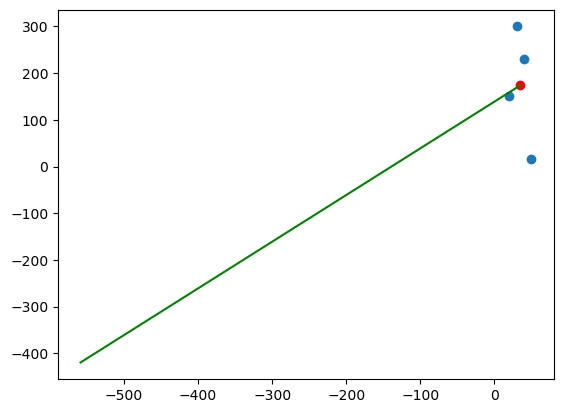

In [123]:
# Représentation graphique avec la moyenne et la covariance
plt.scatter(X_heures, X_km)
plt.scatter(X_heures_mean, X_km_mean, color='red')
plt.plot([X_heures_mean, X_heures_mean + covariance], [X_km_mean, X_km_mean + covariance], color='green')
plt.show()


<span style="color:red">**Voici le problème dans cet exemple :**</span>
- Les heures de travail et les kilomètres parcourus **ne sont pas sur la même échelle**.

D'où l'intérêt de centrer les données.

2. **Correlation** : La correlation est une mesure de la dépendance linéaire entre deux variables aléatoires. Elle est définie par :

$$
Corr(X, Y) = \frac{Cov(X, Y)}{\sigma_X \sigma_Y}
$$

- Si la correlation est **positive**, alors les deux variables sont directement proportionnelles.
- Si la correlation est **négative**, alors les deux variables sont inversément proportionnelles.
- Si la correlation est **nulle**, alors les deux variables sont indépendantes.

La différence entre la covariance et la correlation est que la covariance est exprimée en unités de X et Y, alors que la correlation est exprimée en unités de X et Y.


---

##### Matrice de la covariance

A travers la matrice de la covariance, on cherche à comprendre la relation entre les variables.

$$\begin{bmatrix}
Cov(X_1, X_1) & Cov(X_1, X_2) & Cov(X_1, X_3) & Cov(X_1, X_4) & Cov(X_1, X_5) \\
Cov(X_2, X_1) & Cov(X_2, X_2) & Cov(X_2, X_3) & Cov(X_2, X_4) & Cov(X_2, X_5) \\
Cov(X_3, X_1) & Cov(X_3, X_2) & Cov(X_3, X_3) & Cov(X_3, X_4) & Cov(X_3, X_5) \\
Cov(X_4, X_1) & Cov(X_4, X_2) & Cov(X_4, X_3) & Cov(X_4, X_4) & Cov(X_4, X_5) \\
Cov(X_5, X_1) & Cov(X_5, X_2) & Cov(X_5, X_3) & Cov(X_5, X_4) & Cov(X_5, X_5) \\
\end{bmatrix}$$


La formule pour calculer la matrice de covariance est la suivante :

$$
\frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(X_i - \bar{X})^T
$$



In [124]:
# Calcul de la covariance avec pandas
covariance = xpd.cov()
print(covariance)

# Calcul de la covariance avec numpy
covariance = np.cov(x, rowvar=False)
print(covariance)

          X1        X2        X3        X4        X5
X1  9.166667  9.166667  9.166667  9.166667  9.166667
X2  9.166667  9.166667  9.166667  9.166667  9.166667
X3  9.166667  9.166667  9.166667  9.166667  9.166667
X4  9.166667  9.166667  9.166667  9.166667  9.166667
X5  9.166667  9.166667  9.166667  9.166667  9.166667
[[9.16666667 9.16666667 9.16666667 9.16666667 9.16666667]
 [9.16666667 9.16666667 9.16666667 9.16666667 9.16666667]
 [9.16666667 9.16666667 9.16666667 9.16666667 9.16666667]
 [9.16666667 9.16666667 9.16666667 9.16666667 9.16666667]
 [9.16666667 9.16666667 9.16666667 9.16666667 9.16666667]]


#### Etape 4 : Calcul des valeurs propres et vecteurs propres

Vous vous rappelez de la formule des valeurs propres et vecteurs propres ? 

$$Av=\lambda v$$

On va l'utiliser pour trouver les composantes principales.
La matrice de la covariance est une matrice symétrique. On peut donc utiliser cette formule. D'ailleurs c'est elle qui va remplacer A.



In [125]:
# Pour trouver les valeurs propres et les vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(covariance)
print("Eigen values: ", eigenvalues)
print("Eigen vectors: ", eigenvectors)


Eigen values:  [ 4.58333333e+01  3.35472773e-16  2.46519033e-32  0.00000000e+00
 -2.15776945e-64]
Eigen vectors:  [[ 4.47213595e-01 -3.50236599e-01  3.31723569e-17  3.04486319e-49
   1.81498014e-32]
 [ 4.47213595e-01 -7.09310306e-01 -8.66025404e-01  1.50897899e-33
  -5.10517906e-17]
 [ 4.47213595e-01  3.53182302e-01  2.88675135e-01 -1.22395716e-16
  -8.16496581e-01]
 [ 4.47213595e-01  3.53182302e-01  2.88675135e-01 -7.07106781e-01
   4.08248290e-01]
 [ 4.47213595e-01  3.53182302e-01  2.88675135e-01  7.07106781e-01
   4.08248290e-01]]


Si on interprête les résultats de la matrice de la covariance comme suit :
Eigen values:  [ 4.58333333e+01  3.35472773e-16  2.46519033e-32  0.00000000e+00
 -2.15776945e-64]

On a donc 5 composantes principales :
- 4.58333333e+01 : la première composante principale explique 45.83% de la variance totale.
- 3.35472773e-16 : la deuxième composante principale explique 33.54% de la variance totale.
- 2.46519033e-32 : la troisième composante principale explique 24.65% de la variance totale.
- 0.00000000e+00 : la quatrième composante principale explique 0% de la variance totale.
- -2.15776945e-64 : la cinquième composante principale explique 0% de la variance totale.

> **Remarque :**    
> On peut voir que la troisième composante principale explique 24.65% de la variance totale. C'est une valeur assez élevée. On pourrait donc la garder. Mais on va la supprimer car on veut garder que 2 composantes principales.

Les 2 vecteurs propres associés aux 2 valeurs propres :
- [ 4.47213595e-01 -3.50236599e-01  3.31723569e-17  3.04486319e-49 1.81498014e-32] : le premier vecteur propre 
- [ 4.47213595e-01 -7.09310306e-01 -8.66025404e-01  1.50897899e-33 -5.10517906e-17] : le deuxième vecteur propre

In [126]:

firstVector = eigenvectors[0, :]
print(firstVector)
secondVector = eigenvectors[1, :]
print(secondVector)

[ 4.47213595e-01 -3.50236599e-01  3.31723569e-17  3.04486319e-49
  1.81498014e-32]
[ 4.47213595e-01 -7.09310306e-01 -8.66025404e-01  1.50897899e-33
 -5.10517906e-17]


#### Etape 5 : Projection des données sur les composantes principales

Maintenant qu'on a les composantes principales, on peut projeter les données sur ces composantes principales.

Cela veut dire déplacer les données sur les axes des composantes principales.


La projection des données sur les composantes principales est la suivante :

$$PC_1 = \alpha_1 X_1 + \alpha_2 X_2 + \alpha_3 X_3 + ... + \alpha_n X_n$$


Avec :
- $\alpha_1$ : la première composante principale
- $\alpha_2$ : la deuxième composante principale

On a donc :
- $PC_1 = 0.447213595 X_1 + 0.447213595 X_2 + 0.447213595 X_3 + 0.447213595 X_4 + 0.447213595 X_5$
- $PC_2 = -0.350236599 X_1 - 0.709310306 X_2 + 0.866025404 X_3 + 0 X_4 + 0 X_5$

On peut donc projeter les données sur les composantes principales.


Pour avoir la nouvelle matrice de données, on fait le produit matriciel entre la matrice des données et la matrice des composantes principales.

$$\begin{bmatrix}
X_1 & X_2 & X_3 & X_4 & X_5 \\
\end{bmatrix}^T
\begin{bmatrix}
-0.447213595 & 0.350236599 \\
-0.447213595 & 0.709310306 \\
-0.447213595 & -0.866025404 \\
-0.447213595 & 0 \\
-0.447213595 & 0 \\
\end{bmatrix}=
\begin{bmatrix}
PC_1 & PC_2 \\
\end{bmatrix}$$


        PC1        PC2
0 -0.253260  -3.569483
1 -0.156283  -4.697605
2 -0.059306  -5.825727
3  0.037671  -6.953850
4  0.134648  -8.081972
5  0.231625  -9.210094
6  0.328602 -10.338216
7  0.425579 -11.466338
8  0.522556 -12.594460
9  0.619533 -13.722582


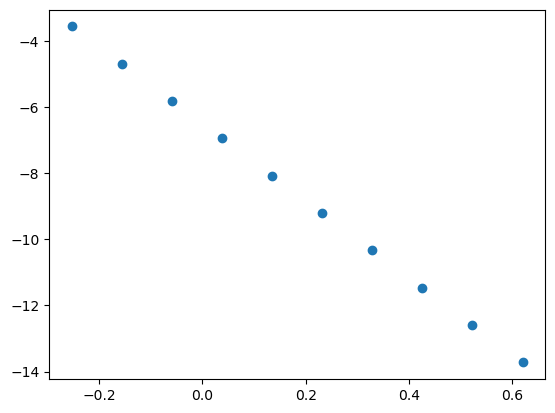

In [127]:
eigenvectors = np.array([firstVector, secondVector])
# Projection des données sur les vecteurs propres
x_pca = eigenvectors.dot(x.T).T

# Afficher les données avec pandas
x_pcaPan = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
print(x_pcaPan)

#Representer les données
plt.scatter(x_pcaPan['PC1'], x_pcaPan['PC2'])
plt.show()

---